In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
from math import radians, degrees
import pandas as pd

In [91]:
R = 1.1 #cm
rho = 0.80989 #g/cm^3
g = 9.81 #m/s^2
sigma = 24.93 #g/s^2
delta = 1e-9
h = 0.001 #step

In [8]:
def f(s, y, R0):
    return np.array((np.cos(y[1]), 2/R0-rho*g*y[2]/sigma-np.sin(y[1])/y[0], -np.sin(y[1])))

In [150]:
def runge_kutta(R0):
    y0 = np.array((R0*delta, delta, 0))
    y = y0.copy()
    sk = 0
    while y0[0] < R:
        sk += h
        p1 = f(sk, y0, R0)
        p2 = f(sk+h/2, y0+h*p1/2, R0)
        p3 = f(sk+h/2, y0+h*p2/2, R0)
        p4 = f(sk+h, y0+h*p3, R0)
        y1 = np.copy(y0) + h*(p1 + 2*p2 + 2*p3 + p4)
        y0 = y1
        y = np.vstack((y, y0))  
    s_max = sk
    
    return y, s_max

In [151]:
y = runge_kutta(2.3)
y

(array([[  2.30000000e-09,   1.00000000e-09,   0.00000000e+00],
        [  6.00000211e-03,   2.60869676e-03,  -1.30435383e-06],
        [  1.19999781e-02,   5.21739961e-03,  -1.82608628e-05],
        [  1.79998894e-02,   7.82613653e-03,  -5.08694675e-05],
        [  2.39996953e-02,   1.04349288e-02,  -9.91301612e-05],
        [  2.99993548e-02,   1.30437987e-02,  -1.63042958e-04],
        [  3.59988272e-02,   1.56527689e-02,  -2.42607902e-04],
        [  4.19980716e-02,   1.82618616e-02,  -3.37825062e-04],
        [  4.79970471e-02,   2.08710994e-02,  -4.48694537e-04],
        [  5.39957130e-02,   2.34805047e-02,  -5.75216454e-04],
        [  5.99940282e-02,   2.60900999e-02,  -7.17390968e-04],
        [  6.59919520e-02,   2.86999076e-02,  -8.75218260e-04],
        [  7.19894435e-02,   3.13099501e-02,  -1.04869854e-03],
        [  7.79864617e-02,   3.39202499e-02,  -1.23783205e-03],
        [  8.39829659e-02,   3.65308294e-02,  -1.44261905e-03],
        [  8.99789149e-02,   3.91417112e

In [152]:
degrees(y[0][-1][1])

30.21529858631119

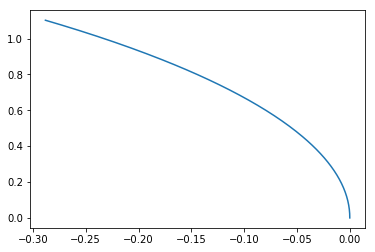

In [153]:
# z(r)
plt.plot(y[0][:, 2], y[0][:, 0])

In [155]:
def m_bisection(theta_0, R1, R2, eps):
    R3 = (R1 + R2)/2
    theta_1 = runge_kutta(R1)[0][-1][1]
    theta_2 = runge_kutta(R2)[0][-1][1]
    theta_3 = runge_kutta(R3)[0][-1][1]
    while abs(degrees(theta_3 - theta_0)) > eps:
        if (theta_3 < theta_0) and (theta_3 > theta_1):
            R1 = R3
        else:
            R2 = R3
        R3 = (R1 + R2)/2
        theta_3 = runge_kutta(R3)[0][-1][1]
    return R3, degrees(theta_3)

In [156]:
R0, theta = m_bisection(radians(30), 2, 11, 1)
R0, theta

(2.28125, 30.463477658799185)

In [157]:
y = runge_kutta(R0)

In [158]:
def bond_number(h0, R, theta):
    return rho*g*h0*R/(2*sigma*np.sin(radians(theta)))

In [159]:
bond_number(abs(y[0][-1][2]), y[0][-1][0], y[0][-1][1])

5.4911591794646766

In [148]:
def m_simpson(y, a, b, n):
    m = 0
    hs = (b - a)/(2*n)
    s = (y[a][0]**2)*np.sin(y[a][1]) + 4*(y[a+hs*(2*n-1)][0]**2)*np.sin(y[a+hs*(2*n-1)][1]) + (y[b][0]**2)*np.sin(y[b][1])
    for i in range(1, n):
        s += 2*(y[a+hs*(2*i)][0]**2)*np.sin(y[a+hs*(2*i)][1]) + 4*(y[a+hs*(2*i-1)][0]**2)*np.sin(y[a+hs*(2*i-1)][1])
    return np.pi*rho*hs*s/3

In [160]:
m_simpson(y[0], 0, y[1], 10)

C:\Users\Katrin\.astropy\anaconda\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Katrin\.astropy\anaconda\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


2.542277194330539e-27

In [184]:
x = np.column_stack((np.ones(len(y[0])), np.arange(1, len(y[0])+1), y[0][:,0], abs(y[0][:,2]), np.zeros(len(y[0]))))

In [188]:
df = pd.DataFrame(data=x)
df

,0,1,2,3,4
0,1.0,1.0,2.281250e-09,0.000000,0.0
1,1.0,2.0,6.000002e-03,0.000001,0.0
2,1.0,3.0,1.199998e-02,0.000018,0.0
3,1.0,4.0,1.799989e-02,0.000051,0.0
4,1.0,5.0,2.399969e-02,0.000100,0.0
5,1.0,6.0,2.999934e-02,0.000164,0.0
6,1.0,7.0,3.599881e-02,0.000245,0.0
7,1.0,8.0,4.199804e-02,0.000341,0.0
8,1.0,9.0,4.799700e-02,0.000452,0.0
9,1.0,10.0,5.399564e-02,0.000580,0.0


In [190]:
np.savetxt(r'np.txt', df, fmt='%f', newline='\r\n', delimiter='\t')